In [1]:
# Import libraries
import expectexception  #%%expect_exception TypeError
import pytest
import matplotlib.pyplot as plt

from pathlib import Path

# 4. Testing Models, Plots and Much More

Learn how you can merge disparate data using inner joins. By combining information from multiple sources you’ll uncover compelling insights that may have previously been hidden. You’ll also learn how the relationship between those sources, such as one-to-one or one-to-many, can affect your result.

# <font color=darkred>4.1 Beyond assertion: setup and teardown</font>

1. Beyond assertion: setup and teardown
>Congratulations, you are now in the fourth and final chapter! In this lesson, we are going to look at functions whose tests require more than assert statements.

2. The preprocessing function
>As an example, consider the function preprocess(), which accepts paths to a raw data file and a clean file as arguments. Let's say that the raw data file looks like this.

3. The preprocessing function
>The function first applies row_to_list() on the rows. The second row has no tab separator,

4. The preprocessing function
>so row_to_list() filters it out.

5. The preprocessing function
>convert_to_int() is applied next. The fourth and fifth rows are dirty because the area and the price entry are missing commas respectively.

6. The preprocessing function
>convert_to_int() filters them out.

7. The preprocessing function
>For the two valid rows, convert_to_int() converts the comma separated strings into integers. The result is written to the clean file.

8. Environment preconditions
>preprocess() is different from other functions because it has a precondition to work properly. The precondition is the presence of a raw data file in the environment.

9. Environment modification
>Another difference is that when we call the function, it modifies the environment by creating a clean data file.

10. Testing the preprocessing function
>We create a test called test_on_raw_data() for this function.

11. Step 1: Setup
>We create the raw data file first. This step is called setup, and it is used to bring the environment to a state where testing can begin.

12. Step 2: Assert
>Then we call the function, which creates the clean data file. We open that file, read it and assert that it contains the expected lines.

13. Step 3: Teardown
>Afterwards, we need to remove the clean and raw data file so that the next run of the test gets a clean environment. This step is called teardown, and it cleans any modification to the environment and brings it back to the initial state.

14. The new workflow
>To summarize, instead of a sequence of assert statements, we have to follow the workflow: setup, assert and teardown.

15. Fixture
>In pytest, the setup and teardown is placed outside the test, in a function called a fixture. A fixture is a function which has the pytest.fixture decorator. The first section is the setup. Then the function returns the data that the test needs. The test can access this data by calling the fixture passed as an argument.

16. Fixture
>But instead of using the return keyword, the fixture function actually uses the yield keyword instead. The next section is the teardown. This section runs only when the test has finished executing.

17. Fixture example
>Let's see an example of how this works for the test test_on_raw_data().

18. Fixture example
>We create a fixture called raw_and_clean_data_file(). In setup, we create the paths to the raw and clean data file. Next, we write the raw data to the raw data file. Finally, we yield the paths as a tuple. The test calls the fixture and gets the paths required to call the preprocess() function. Then we proceed to the assert statements. In the teardown section, we remove both raw and clean data file using the os.remove() function.

19. The built-in tmpdir fixture
>There is a built-in pytest fixture called tmpdir, which is useful when dealing with files. This fixture creates a temporary directory during setup and deletes the temporary directory during teardown.

20. tmpdir and fixture chaining
>We can pass this fixture as an argument to our fixture. This is called fixture chaining, which results in the setup of tmpdir to be called first, followed by the setup of our fixture. When the test finishes, the teardown of our fixture is called first, followed by the teardown of tmpdir. The tmpdir argument supports all os.path commands such as join. We use the join function of tmpdir to create the raw and clean data file inside the temporary directory. The rest of the setup looks identical. The awesome thing is: we can omit the teardown code in our fixture entirely, because the teardown of tmpdir will delete all files in the temporary directory when the test ends.

21. Let's practice setup and teardown using fixtures!
>Let's get some practice with using fixtures in the exercises.

## <font color=blue>WITHOUT TEMPDIR</font>

In [2]:
%cd univariate-linear-regression/src/test
with open("data/test_preprocessing_helpers.py", "w") as text_file:
    text_file.write("""
import pytest
import os

from data.preprocessing_helpers import convert_to_int, row_to_list, preprocess

@pytest.fixture
def raw_and_clean_data_file():
    raw_data_file_path = "raw.txt"
    clean_data_file_path = "clean.txt"
    with open(raw_data_file_path, "w") as f: 
        f.write("1,801\\t201,411\\n1,767565,112\\n2,002\\t333,209\\n1990\\t782,911\\n1,285\\t389129\\n")
    yield raw_data_file_path, clean_data_file_path
    os.remove(raw_data_file_path) 
    os.remove(clean_data_file_path)


class TestConvertToInt(object):
    def test_with_no_comma(self):
        actual = convert_to_int("756")
        assert actual == 756, "Expected: 756, Actual: {0}".format(actual)
    
    def test_with_one_comma(self):
        actual = convert_to_int("2,081")
        assert actual == 2081, "Expected: 2081, Actual: {0}".format(actual)
    
    def test_with_two_commas(self):
        actual = convert_to_int("1,034,891")
        assert actual == 1034891, "Expected: 2081, Actual: {0}".format(actual)
    
    def test_on_string_with_missing_comma(self):
        actual = convert_to_int("178100,301")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_string_with_incorrectly_placed_comma(self):
        actual = convert_to_int("12,72,891")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_float_valued_string(self):
        actual = convert_to_int("23,816.92")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)


class TestRowToList(object):
    def test_on_normal_argument_1(self):
        actual = row_to_list("123\\t4,567\\n")
        expected = ["123", "4,567"]
        assert actual == expected, "Expected: {0}, Actual: {1}".format(expected, actual)
    
    def test_on_normal_argument_2(self):
        actual = row_to_list("1,059\\t186,606\\n")
        expected = ["1,059", "186,606"]
        assert actual == expected, "Expected: {0}, Actual: {1}".format(actual, expected)

    def test_on_no_tab_with_missing_value(self):      # (0, 1) case
        actual = row_to_list('\\n')
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_two_tabs_with_missing_value(self):    # (2, 1) case
        actual = row_to_list("123\\t\\t89\\n")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)

    def test_on_no_tab_no_missing_value(self):        # (0, 0) boundary value
        actual = row_to_list('123\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
    
    def test_on_two_tabs_no_missing_value(self):      # (2, 0) boundary value
        actual = row_to_list('123\\t4,567\\t89\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
    
    def test_on_one_tab_with_missing_value(self):     # (1, 1) boundary value
        actual = row_to_list('\\t4,567\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
        

class TestPreprocess(object):
    def test_on_raw_data(self, raw_and_clean_data_file):
        raw_path, clean_path = raw_and_clean_data_file 
        preprocess(raw_path, clean_path)
        
        with open(clean_path, 'r') as f: 
            lines = f.readlines() 
        
        assert lines[0] == "1801\\t201411\\n" # Compare first_line
        assert lines[1] == "2002\\t333209\\n" # Compare second_line
    """)
    
!pytest data/test_preprocessing_helpers.py
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 14 items

data\test_preprocessing_helpers.py ..............                        [100%]

============================= 14 passed in 0.32s ==============================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


## <font color=blue>USING TMPDIR AND FIXTURE CHAINING</font>

In [3]:
%cd univariate-linear-regression/src/test
with open("data/test_preprocessing_helpers.py", "w") as text_file:
    text_file.write("""
import pytest
import os

from data.preprocessing_helpers import convert_to_int, row_to_list, preprocess

@pytest.fixture
def raw_and_clean_data_file(tmpdir):
    raw_data_file_path = tmpdir.join("raw.txt")
    clean_data_file_path = tmpdir.join("clean.txt")
    with open(raw_data_file_path, "w") as f: 
        f.write("1,801\\t201,411\\n1,767565,112\\n2,002\\t333,209\\n1990\\t782,911\\n1,285\\t389129\\n")
    yield raw_data_file_path, clean_data_file_path
    # No teardown code necessary


class TestConvertToInt(object):
    def test_with_no_comma(self):
        actual = convert_to_int("756")
        assert actual == 756, "Expected: 756, Actual: {0}".format(actual)
    
    def test_with_one_comma(self):
        actual = convert_to_int("2,081")
        assert actual == 2081, "Expected: 2081, Actual: {0}".format(actual)
    
    def test_with_two_commas(self):
        actual = convert_to_int("1,034,891")
        assert actual == 1034891, "Expected: 2081, Actual: {0}".format(actual)
    
    def test_on_string_with_missing_comma(self):
        actual = convert_to_int("178100,301")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_string_with_incorrectly_placed_comma(self):
        actual = convert_to_int("12,72,891")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_float_valued_string(self):
        actual = convert_to_int("23,816.92")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)


class TestRowToList(object):
    def test_on_normal_argument_1(self):
        actual = row_to_list("123\\t4,567\\n")
        expected = ["123", "4,567"]
        assert actual == expected, "Expected: {0}, Actual: {1}".format(expected, actual)
    
    def test_on_normal_argument_2(self):
        actual = row_to_list("1,059\\t186,606\\n")
        expected = ["1,059", "186,606"]
        assert actual == expected, "Expected: {0}, Actual: {1}".format(actual, expected)

    def test_on_no_tab_with_missing_value(self):      # (0, 1) case
        actual = row_to_list('\\n')
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_two_tabs_with_missing_value(self):    # (2, 1) case
        actual = row_to_list("123\\t\\t89\\n")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)

    def test_on_no_tab_no_missing_value(self):        # (0, 0) boundary value
        actual = row_to_list('123\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
    
    def test_on_two_tabs_no_missing_value(self):      # (2, 0) boundary value
        actual = row_to_list('123\\t4,567\\t89\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
    
    def test_on_one_tab_with_missing_value(self):     # (1, 1) boundary value
        actual = row_to_list('\\t4,567\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
        

class TestPreprocess(object):
    def test_on_raw_data(self, raw_and_clean_data_file):
        raw_path, clean_path = raw_and_clean_data_file 
        preprocess(raw_path, clean_path)
        
        with open(clean_path, 'r') as f: 
            lines = f.readlines() 
        
        assert lines[0] == "1801\\t201411\\n" # Compare first_line
        assert lines[1] == "2002\\t333209\\n" # Compare second_line
    """)
    
!pytest data/test_preprocessing_helpers.py
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 14 items

data\test_preprocessing_helpers.py ..............                        [100%]

============================= 14 passed in 0.29s ==============================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


# <font color=darkred>4.2 Use a fixture for a clean data file</font> 

In the video, you saw how the preprocess() function creates a clean data file.

The get_data_as_numpy_array() function takes the path to this clean data file as the first argument and the number of columns of data as the second argument. It returns a NumPy array holding the data.

In a previous exercise, you wrote the test test_on_clean_file() without using a fixture. That's bad practice! This time, you'll use the fixture clean_data_file(), which

    - creates a clean data file in the setup,
    - yields the path to the clean data file,
    - removes the clean data file in the teardown.

The contents of the clean data file that you will use for testing is printed in the IPython console.

pytest, os, numpy as np and get_data_as_numpy_array() have been imported for you.

**Instructions**
- Add the correct decorator that would turn clean_data_file() into a fixture.
- Pass an argument to the test test_on_clean_file() so that it uses the fixture.
- Pass the clean data file path yielded by the fixture as the first argument to the function get_data_as_numpy_array().

**Results**

<font color=darkgreen>Good work! pytest keeps the fixtures separate from the tests as this encourages reusing fixtures for tests that need the same/similar setup and teardown code.</font>

In [4]:
%cd univariate-linear-regression/src/test
with open("features/test_as_numpy.py", "w") as text_file:
    text_file.write("""
import pytest

from features.as_numpy import get_data_as_numpy_array
import numpy as np
import os

@pytest.fixture
def clean_data_file():
    file_path = "clean_data_file.txt"
    with open(file_path, "w") as f:
        f.write("201\\t305671\\n7892\\t298140\\n501\\t738293\\n")
    yield file_path
    os.remove(file_path)
    
class TestGetDataAsNumpyArray(object):
    def test_on_clean_file(self, clean_data_file):
        expected = np.array([[201.0, 305671.0], [7892.0, 298140.0], [501.0, 738293.0]])
        actual = get_data_as_numpy_array(clean_data_file, 2)
        
        assert actual == pytest.approx(expected), "Expected: {0}, Actual: {1}".format(expected, actual) 
    """)
    
!pytest -rxs features/test_as_numpy.py
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 1 item

features\test_as_numpy.py .                                              [100%]

============================== 1 passed in 0.22s ==============================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


# <font color=darkred>4.3 Write a fixture for an empty data file</font> 

When a function takes a data file as an argument, you need to write a fixture that takes care of creating and deleting that data file. This exercise will test your ability to write such a fixture.

get_data_as_numpy_array() should return an empty numpy array if it gets an empty data file as an argument. To test this behavior, you need to write a fixture empty_file() that does the following.

- Creates an empty data file empty.txt relative to the current working directory in setup.
- Yields the path to the empty data file.
- Deletes the empty data file in teardown.

The fixture will be used by the test test_on_empty_file(), which is available for you to see in the script.

os, pytest, numpy as np and get_data_as_numpy_array have been imported for you.

**Instructions**
- In the setup, assign the variable file_path to the correct string.
- After the setup, yield the variable file_path so that the test can use it.
- In the teardown, remove the file.

- The test test_on_empty_file() was added to the test class TestGetDataAsNumpyArray, which lives in the test module tests/features/test_as_numpy.py. The fixture empty_file() was also written to this test module. Remembering that the current working directory in the IPython console is tests, run the test test_on_empty_file(). What is the outcome?
    - The test passes.
    - The test fails because get_data_as_numpy_array() does not return an empty NumPy array, and instead returns None.
    - The test fails with a NameError as Python 3 does not recognize the xrange() function.

**Results**

<font color=darkgreen>Right you are! Notice that fixtures like empty_file() are quite reusable, since any function which accepts data files as arguments needs to be tested with an empty file.</font>

In [5]:
%cd univariate-linear-regression/src/test
with open("features/test_as_numpy.py", "w") as text_file:
    text_file.write("""
import pytest

from features.as_numpy import get_data_as_numpy_array
import numpy as np
import os


@pytest.fixture
def empty_file():
    # Assign the file path "empty.txt" to the variable
    file_path = "empty.txt"
    open(file_path, "w").close()
    # Yield the variable file_path
    yield file_path
    # Remove the file in the teardown
    os.remove(file_path)
    

class TestGetDataAsNumpyArray(object):
    def test_on_clean_file(self):
        expected = np.array([[2081.0, 314942.0],
                             [1059.0, 186606.0],
                             [1148.0, 206186.0]
                            ])
        actual = get_data_as_numpy_array("example_clean_data2.txt", num_columns=2)
        message = "Expected return value: {0}, Actual return value: {1}".format(expected, actual)
        assert (actual == expected).all()


    def test_on_empty_file(self, empty_file):
        expected = np.empty((0, 2))
        actual = get_data_as_numpy_array(empty_file, 2)
        assert actual == pytest.approx(expected), "Expected: {0}, Actual: {1}".format(expected, actual)
    """)

!pytest -k "test_on_empty_file"
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 32 items / 31 deselected / 1 selected

features\test_as_numpy.py .                                              [100%]

====================== 1 passed, 31 deselected in 2.39s =======================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


# <font color=darkred>4.4 Fixture chaining using tmpdir</font> 

The built-in tmpdir fixture is very useful when dealing with files in setup and teardown. tmpdir combines seamlessly with user defined fixture via fixture chaining.

In this exercise, you will use the power of tmpdir to redefine and improve the empty_file() fixture that you wrote in the last exercise and get some experience with fixture chaining.

**Instructions**
- Add the correct argument to the fixture empty_file() so that it chains with the built-in fixture tmpdir.
- Use the appropriate method to create an empty file "empty.txt" inside the temporary directory created by tmpdir.
- In what order will the setup and teardown of empty_file() and tmpdir be executed?

    - setup of empty_file()  setup of tmpdir  teardown of tmpdir  teardown of empty_file().
    - setup of tmpdir  setup of empty_file()  teardown of empty_file()  teardown of tmpdir.
    - setup of tmpdir  setup of empty_file()  teardown of tmpdir  teardown of empty_file().

**Results**

<font color=darkgreen>Well ordered! Notice how you didn't have to write any teardown code to delete the empty file, because tmpdir is going to take care of that for us in its teardown step, which is executed last.</font>

In [6]:
%cd univariate-linear-regression/src/test
with open("features/test_as_numpy.py", "w") as text_file:
    text_file.write("""
import pytest

from features.as_numpy import get_data_as_numpy_array
import numpy as np
import os


@pytest.fixture
def empty_file(tmpdir):
    file_path = tmpdir.join("empty.txt")
    open(file_path, "w").close()
    yield file_path
    

class TestGetDataAsNumpyArray(object):
    def test_on_clean_file(self):
        expected = np.array([[2081.0, 314942.0],
                             [1059.0, 186606.0],
                             [1148.0, 206186.0]
                            ])
        actual = get_data_as_numpy_array("example_clean_data2.txt", num_columns=2)
        message = "Expected return value: {0}, Actual return value: {1}".format(expected, actual)
        assert (actual == expected).all()


    def test_on_empty_file(self, empty_file):
        expected = np.empty((0, 2))
        actual = get_data_as_numpy_array(empty_file, 2)
        assert actual == pytest.approx(expected), "Expected: {0}, Actual: {1}".format(expected, actual)
    """)

!pytest -k "test_on_empty_file"
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 32 items / 31 deselected / 1 selected

features\test_as_numpy.py .                                              [100%]

====================== 1 passed, 31 deselected in 1.18s =======================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


# <font color=darkred>4.5 Mocking</font>

1. Mocking
>In the previous lesson, we tested the preprocess() function.

2. The preprocessing function
>preprocess() applies

3. The preprocessing function
>row_to_list() and

4. The preprocessing function
>convert_to_int() sequentially to the raw data file to create a clean data file.

5. Test result depend on dependencies
>If the tests for preprocess() were to pass, row_to_list() and convert_to_int() must also work as expected.

6. Test result depend on dependencies
>If any of them has a bug, the tests for preprocess() will not pass, even if preprocess() has no bugs.

7. Test result depends on dependencies
>But the test results should be indicative of the bugs in the function under test, and not bugs in any of its dependencies.

8. Mocking: testing functions independently of dependencies
>In this lesson, we will learn a trick which will allow us to test a function independently of its dependencies. This very useful trick is called mocking. To use mocking in pytest, we will need two packages. The first one is pytest-mock and we can install it using pip. The second one is a standard library package called unittest.mock.

9. MagicMock() and mocker.patch()
>The basic idea of mocking

10. MagicMock() and mocker.patch()
>is to replace potentially buggy dependencies such as row_to_list() with the object unittest.mock.MagicMock(), but only during testing. This replacement is done using a fixture called mocker, and calling its patch method right at the beginning of the test test_on_raw_data(), which we wrote in the last lesson.

11. MagicMock() and mocker.patch()
>The first argument of the mocker.patch method is the fully qualified name of the dependency including module name, as registered by the function under test.

12. MagicMock() and mocker.patch()
>preprocess() knows row_to_list() as data.preprocessing_helpers.row_to_list, so that's what we will use here. The mocker.patch method returns the MagicMock object which we store in the variable row_to_list_mock.

13. Making the MagicMock() bug-free
>During the test, row_to_list_mock can be programmed to behave like a bug-free replacement of row_to_list(). We call the bug free version of row_to_list() as row_to_list_bug_free(). Note that this only needs to be bug-free in the context of the test, and therefore, can be much simpler than the actual row_to_list() function. In the test, we use the following raw data file, which we already saw in the last lesson. The row_to_list_bug_free() simply needs to return the correct result for these five rows. Therefore, we create a dictionary containing the correct results for these five rows and return the results from the dictionary. Then we set the side_effect attribute of the MagicMock() object to the bug-free version.

14. Side effect
>We can also set the side_effect attribute by passing side_effect as a keyword argument to mocker.patch. mocker.patch treats any keyword argument that it does not recognize as an attribute of the returned MagicMock() object and sets the attribute value accordingly.

15. Bug free replacement of dependency
>From this point on, when we call preprocess() in the test, the bug-free mock of row_to_list() will be used, and the test will not encounter any bugs.

16. Checking the arguments
>We can also check if preprocess() is calling row_to_list() with the correct arguments. The call_args_list attribute is a list of all the arguments that row_to_list_mock was called with, wrapped in a convenience object called call().

17. Checking the arguments
>This convenience object can be imported from unittest.mock, and we import it at the top of the test. In the test, we can assert that the call_args_list attribute is the expected list containing the five rows of the raw data file in the correct order.

18. Dependency buggy, function bug-free, test still passes!
>We have prepared a scenario where row_to_list() contains a bug but preprocess() doesn't. If we run the tests for both functions, we see that the some tests for row_to_list() fail,

19. Dependency buggy, function bug-free, test still passes!
>but the test for preprocess() passes. That's exactly the behavior we wanted!

20. Let's practice mocking!
>Now let's practice some mocking magic in the exercises!

## The problem: <font color=red>row_to_list function (dependency of preprocess) has an error so the preprocess return an error in the test<font>

In [7]:
%cd test_practices
with open("test_preprocessing_helpers_mocking.py", "w") as text_file:
    text_file.write("""
import pytest
import os

from pythoncode.preprocessing_helpers_wrong_rowtolist import row_to_list, convert_to_int, preprocess

@pytest.fixture
def raw_and_clean_data_file(tmpdir):
    raw_data_file_path = tmpdir.join("raw.txt")
    clean_data_file_path = tmpdir.join("clean.txt")
    with open(raw_data_file_path, "w") as f: 
        f.write("1,801\\t201,411\\n1,767565,112\\n2,002\\t333,209\\n1990\\t782,911\\n1,285\\t389129\\n")
    yield raw_data_file_path, clean_data_file_path
    # No teardown code necessary


class TestRowToList(object):
    def test_on_normal_argument_1(self):
        actual = row_to_list("123\\t4,567\\n")
        expected = ["123", "4,567"]
        assert actual == expected, "Expected: {0}, Actual: {1}".format(expected, actual)
    
    def test_on_normal_argument_2(self):
        actual = row_to_list("1,059\\t186,606\\n")
        expected = ["1,059", "186,606"]
        assert actual == expected, "Expected: {0}, Actual: {1}".format(actual, expected)

    def test_on_no_tab_with_missing_value(self):      # (0, 1) case
        actual = row_to_list('\\n')
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_two_tabs_with_missing_value(self):    # (2, 1) case
        actual = row_to_list("123\\t\\t89\\n")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)

    def test_on_no_tab_no_missing_value(self):        # (0, 0) boundary value
        actual = row_to_list('123\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
    
    def test_on_two_tabs_no_missing_value(self):      # (2, 0) boundary value
        actual = row_to_list('123\\t4,567\\t89\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
    
    def test_on_one_tab_with_missing_value(self):     # (1, 1) boundary value
        actual = row_to_list('\\t4,567\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
        

class TestConvertToInt(object):
    def test_with_no_comma(self):
        actual = convert_to_int("756")
        assert actual == 756, "Expected: 756, Actual: {0}".format(actual)
    
    def test_with_one_comma(self):
        actual = convert_to_int("2,081")
        assert actual == 2081, "Expected: 2081, Actual: {0}".format(actual)
    
    def test_with_two_commas(self):
        actual = convert_to_int("1,034,891")
        assert actual == 1034891, "Expected: 2081, Actual: {0}".format(actual)
    
    def test_on_string_with_missing_comma(self):
        actual = convert_to_int("178100,301")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_string_with_incorrectly_placed_comma(self):
        actual = convert_to_int("12,72,891")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_float_valued_string(self):
        actual = convert_to_int("23,816.92")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)


class TestPreprocess(object):
    def test_on_raw_data(self, raw_and_clean_data_file):
        raw_path, clean_path = raw_and_clean_data_file 
        preprocess(raw_path, clean_path)
        
        with open(clean_path, 'r') as f: 
            lines = f.readlines() 
        
        assert lines[0] == "1801\\t201411\\n" # Compare first_line
        assert lines[1] == "2002\\t333209\\n" # Compare second_line
    """)
    
!pytest test_preprocessing_helpers_mocking.py::TestPreprocess
%cd ..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\test_practices
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\test_practices
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 1 item

test_preprocessing_helpers_mocking.py F                                  [100%]

================================== FAILURES ===================================
_______________________ TestPreprocess.test_on_raw_data _______________________

self = <test_preprocessing_helpers_mocking.TestPreprocess object at 0x0000012C4D7DB4C0>
raw_and_clean_data_file = (local('C:\\Users\\jaces\\AppData\\Local\\Temp\\pytest-of-jaces\\pytest-56\\test_on_raw_data0\\raw.txt'), local('C:\\Users\\jaces\\AppData\\Local\\Temp\\pytest-of-jaces\

## SOLUTIONS

In [8]:
%cd test_practices
with open("test_preprocessing_helpers_mocking.py", "w") as text_file:
    text_file.write("""
import pytest
import os
from unittest.mock import call

from pythoncode.preprocessing_helpers_wrong_rowtolist import row_to_list, convert_to_int, preprocess

@pytest.fixture
def raw_and_clean_data_file(tmpdir):
    raw_data_file_path = tmpdir.join("raw.txt")
    clean_data_file_path = tmpdir.join("clean.txt")
    with open(raw_data_file_path, "w") as f: 
        f.write("1,801\\t201,411\\n1,767565,112\\n2,002\\t333,209\\n1990\\t782,911\\n1,285\\t389129\\n")
    yield raw_data_file_path, clean_data_file_path
    # No teardown code necessary

def row_to_list_bug_free(row):
    return_values = {
        "1,801\\t201,411\\n": ["1,801", "201,411"],
        "1,767565,112\\n"   : None,
        "2,002\\t333,209\\n": ["2,002", "333,209"],
        "1990\\t782,911\\n" : ["1990", "782,911"],
        "1,285\\t389129\\n" : ["1,285", "389129"], }
    return return_values[row]


class TestRowToList(object):
    def test_on_normal_argument_1(self):
        actual = row_to_list("123\\t4,567\\n")
        expected = ["123", "4,567"]
        assert actual == expected, "Expected: {0}, Actual: {1}".format(expected, actual)
    
    def test_on_normal_argument_2(self):
        actual = row_to_list("1,059\\t186,606\\n")
        expected = ["1,059", "186,606"]
        assert actual == expected, "Expected: {0}, Actual: {1}".format(actual, expected)

    def test_on_no_tab_with_missing_value(self):      # (0, 1) case
        actual = row_to_list('\\n')
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_two_tabs_with_missing_value(self):    # (2, 1) case
        actual = row_to_list("123\\t\\t89\\n")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)

    def test_on_no_tab_no_missing_value(self):        # (0, 0) boundary value
        actual = row_to_list('123\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
    
    def test_on_two_tabs_no_missing_value(self):      # (2, 0) boundary value
        actual = row_to_list('123\\t4,567\\t89\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
    
    def test_on_one_tab_with_missing_value(self):     # (1, 1) boundary value
        actual = row_to_list('\\t4,567\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
        

class TestConvertToInt(object):
    def test_with_no_comma(self):
        actual = convert_to_int("756")
        assert actual == 756, "Expected: 756, Actual: {0}".format(actual)
    
    def test_with_one_comma(self):
        actual = convert_to_int("2,081")
        assert actual == 2081, "Expected: 2081, Actual: {0}".format(actual)
    
    def test_with_two_commas(self):
        actual = convert_to_int("1,034,891")
        assert actual == 1034891, "Expected: 2081, Actual: {0}".format(actual)
    
    def test_on_string_with_missing_comma(self):
        actual = convert_to_int("178100,301")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_string_with_incorrectly_placed_comma(self):
        actual = convert_to_int("12,72,891")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_float_valued_string(self):
        actual = convert_to_int("23,816.92")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)


class TestPreprocess(object):
    def test_on_raw_data(self, raw_and_clean_data_file, mocker):
        raw_path, clean_path = raw_and_clean_data_file 
        
        #row_to_list_mock = mocker.patch("data.preprocessing_helpers.row_to_list")
        #row_to_list_mock.side_effect = row_to_list_bug_free
        
        row_to_list_mock = mocker.patch("pythoncode.preprocessing_helpers_wrong_rowtolist.row_to_list", 
                                        side_effect = row_to_list_bug_free )
        
        preprocess(raw_path, clean_path)
        assert row_to_list_mock.call_args_list == [ call("1,801\\t201,411\\n"), 
                                                    call("1,767565,112\\n"), 
                                                    call("2,002\\t333,209\\n"), 
                                                    call("1990\\t782,911\\n"), 
                                                    call("1,285\\t389129\\n") ]
        
        with open(clean_path, 'r') as f: 
            lines = f.readlines() 
        
        assert lines[0] == "1801\\t201411\\n" # Compare first_line
        assert lines[1] == "2002\\t333209\\n" # Compare second_line
    """)
    
!pytest test_preprocessing_helpers_mocking.py::TestPreprocess
%cd ..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\test_practices
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\test_practices
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 1 item

test_preprocessing_helpers_mocking.py .                                  [100%]

============================== 1 passed in 0.19s ==============================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


# <font color=darkred>4.6 Program a bug-free dependency</font> 

In the video, row_to_list() was mocked. But preprocess() has another dependency convert_to_int(). Generally, its best to mock all dependencies of the function under test. It's your job to mock convert_to_int() in this and the following exercises.

The raw data file used in the test is printed in the IPython console. The second row "1,767565,112\n" is dirty, so row_to_list() will filter it out. The rest will be converted to lists and convert_to_int() will process the areas and prices.

The mocked convert_to_int() should process these areas and prices correctly. Here is the dictionary holding the correct return values.

{"1,801": 1801, "201,411": 201411, "2,002": 2002, "333,209": 333209, "1990": None, "782,911": 782911, "1,285": 1285, "389129": None}

**Instructions**
- Define a function convert_to_int_bug_free() which takes one argument called comma_separated_integer_string.
- Assign return_values to the dictionary holding the correct return values in the context of the raw data file used in the test.
- Return the correct return value by looking up the dictionary return_values for the key comma_separated_integer_string.

**Results**

<font color=darkgreen>Perfectly done! Note that the bug-free version of the dependency is usually much simpler that the dependency itself, since it just needs to be bug-free for the arguments that it receives within the test. It does not need to bug-free in the general case i.e. for any argument imaginable.</font>

In [9]:
# Define a function convert_to_int_bug_free
def convert_to_int_bug_free(comma_separated_integer_string):
    # Assign to the dictionary holding the correct return values 
    return_values = {"1,801"  : 1801, 
                     "201,411": 201411, 
                     "2,002"  : 2002, 
                     "333,209": 333209, 
                     "1990"   : None, 
                     "782,911": 782911, 
                     "1,285"  : 1285, 
                     "389129" : None}
    # Return the correct result using the dictionary return_values
    return return_values[comma_separated_integer_string]

# <font color=darkred>4.7 Mock a dependency</font> 

Mocking helps us replace a dependency with a MagicMock() object. Usually, the MagicMock() is programmed to be a bug-free version of the dependency. To verify whether the function under test works properly with the dependency, you simply check whether the MagicMock() is called with the correct arguments and in the right order.

In the last exercise, you programmed a bug-free version of the dependency data.preprocessing_helpers.convert_to_int in the context of the test test_on_raw_data(), which applies preprocess() on a raw data file. The data file is printed out in the IPython console.

pytest, unittest.mock.call, preprocess raw_and_clean_data_file and convert_to_int_bug_free has been imported for you.

**Instructions**
- In the test test_on_raw_data(), add the correct argument that enables the use of the mocking fixture.
- Replace the dependency "data.preprocessing_helpers.convert_to_int" with the bug-free version convert_to_int_bug_free() by using the correct method and side effect.
- Use the correct attribute which returns the list of calls to the mock, and check if the mock was called with this sequence of arguments: "1,801", "201,411", "2,002", "333,209", "1990", "782,911", "1,285", "389129".


- The test that you wrote was written to the test class TestPreprocess in the test module data/test_preprocessing_helpers.py. The same test module also contains the test class TestConvertToInt. Run the tests in TestPreprocess and TestConvertToInt. Based on the test result report, which of the following is correct?
    - The tests for both convert_to_int() and preprocess() passes.
    - The tests for convert_to_int() passes but the test for preprocess() fails.
    - <font color=red>Some tests for convert_to_int() fail but the test for preprocess() passes.</font>

**Results**

<font color=darkgreen>Wow! You are turning into a seasoned tester! The results tell us that preprocess() is defined correctly and is bug-free. But one of its dependencies convert_to_int() has bugs. This kind of precise result is only possible using mocking.</font>

## The problem: <font color=red>convert_to_int function (dependency of preprocess) has an error so the preprocess return an error in the test<font>

In [10]:
%cd test_practices
with open("test_preprocessing_helpers_mocking.py", "w") as text_file:
    text_file.write("""
import pytest
import os

from pythoncode.preprocessing_helpers_wrong_converttoint import row_to_list, convert_to_int, preprocess

@pytest.fixture
def raw_and_clean_data_file(tmpdir):
    raw_data_file_path = tmpdir.join("raw.txt")
    clean_data_file_path = tmpdir.join("clean.txt")
    with open(raw_data_file_path, "w") as f: 
        f.write("1,801\\t201,411\\n1,767565,112\\n2,002\\t333,209\\n1990\\t782,911\\n1,285\\t389129\\n")
    yield raw_data_file_path, clean_data_file_path
    # No teardown code necessary


class TestRowToList(object):
    def test_on_normal_argument_1(self):
        actual = row_to_list("123\\t4,567\\n")
        expected = ["123", "4,567"]
        assert actual == expected, "Expected: {0}, Actual: {1}".format(expected, actual)
    
    def test_on_normal_argument_2(self):
        actual = row_to_list("1,059\\t186,606\\n")
        expected = ["1,059", "186,606"]
        assert actual == expected, "Expected: {0}, Actual: {1}".format(actual, expected)

    def test_on_no_tab_with_missing_value(self):      # (0, 1) case
        actual = row_to_list('\\n')
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_two_tabs_with_missing_value(self):    # (2, 1) case
        actual = row_to_list("123\\t\\t89\\n")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)

    def test_on_no_tab_no_missing_value(self):        # (0, 0) boundary value
        actual = row_to_list('123\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
    
    def test_on_two_tabs_no_missing_value(self):      # (2, 0) boundary value
        actual = row_to_list('123\\t4,567\\t89\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
    
    def test_on_one_tab_with_missing_value(self):     # (1, 1) boundary value
        actual = row_to_list('\\t4,567\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
        

class TestConvertToInt(object):
    def test_with_no_comma(self):
        actual = convert_to_int("756")
        assert actual == 756, "Expected: 756, Actual: {0}".format(actual)
    
    def test_with_one_comma(self):
        actual = convert_to_int("2,081")
        assert actual == 2081, "Expected: 2081, Actual: {0}".format(actual)
    
    def test_with_two_commas(self):
        actual = convert_to_int("1,034,891")
        assert actual == 1034891, "Expected: 2081, Actual: {0}".format(actual)
    
    def test_on_string_with_missing_comma(self):
        actual = convert_to_int("178100,301")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_string_with_incorrectly_placed_comma(self):
        actual = convert_to_int("12,72,891")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_float_valued_string(self):
        actual = convert_to_int("23,816.92")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)


class TestPreprocess(object):
    def test_on_raw_data(self, raw_and_clean_data_file):
        raw_path, clean_path = raw_and_clean_data_file 
        preprocess(raw_path, clean_path)
        
        with open(clean_path, 'r') as f: 
            lines = f.readlines() 
        
        assert lines[0] == "1801\\t201411\\n" # Compare first_line
        assert lines[1] == "2002\\t333209\\n" # Compare second_line
    """)
    
!pytest test_preprocessing_helpers_mocking.py::TestPreprocess
%cd ..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\test_practices
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\test_practices
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 1 item

test_preprocessing_helpers_mocking.py F                                  [100%]

================================== FAILURES ===================================
_______________________ TestPreprocess.test_on_raw_data _______________________

self = <test_preprocessing_helpers_mocking.TestPreprocess object at 0x000001FACA4AA5B0>
raw_and_clean_data_file = (local('C:\\Users\\jaces\\AppData\\Local\\Temp\\pytest-of-jaces\\pytest-58\\test_on_raw_data0\\raw.txt'), local('C:\\Users\\jaces\\AppData\\Local\\Temp\\pytest-of-jaces\

## SOLUTIONS

In [11]:
%cd test_practices
with open("test_preprocessing_helpers_mocking2.py", "w") as text_file:
    text_file.write("""
import pytest
import os
from unittest.mock import call

from pythoncode.preprocessing_helpers_wrong_converttoint import row_to_list, convert_to_int, preprocess

@pytest.fixture
def raw_and_clean_data_file(tmpdir):
    raw_data_file_path = tmpdir.join("raw.txt")
    clean_data_file_path = tmpdir.join("clean.txt")
    with open(raw_data_file_path, "w") as f: 
        f.write("1,801\\t201,411\\n"
                "1,767565,112\\n"
                "2,002\\t333,209\\n"
                "1990\\t782,911\\n"
                "1,285\\t389129\\n"
                )
    yield raw_data_file_path, clean_data_file_path
    # No teardown code necessary

# Making the MagicMock() bug-free
def convert_to_int_bug_free(comma_separated_integer_string):
    # Assign to the dictionary holding the correct return values 
    return_values = {"1,801"  : 1801, 
                     "201,411": 201411, 
                     "2,002"  : 2002, 
                     "333,209": 333209, 
                     "1990"   : None, 
                     "782,911": 782911, 
                     "1,285"  : 1285, 
                     "389129" : None}
    # Return the correct result using the dictionary return_values
    return return_values[comma_separated_integer_string]

class TestRowToList(object):
    def test_on_normal_argument_1(self):
        actual = row_to_list("123\\t4,567\\n")
        expected = ["123", "4,567"]
        assert actual == expected, "Expected: {0}, Actual: {1}".format(expected, actual)
    
    def test_on_normal_argument_2(self):
        actual = row_to_list("1,059\\t186,606\\n")
        expected = ["1,059", "186,606"]
        assert actual == expected, "Expected: {0}, Actual: {1}".format(actual, expected)

    def test_on_no_tab_with_missing_value(self):      # (0, 1) case
        actual = row_to_list('\\n')
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_two_tabs_with_missing_value(self):    # (2, 1) case
        actual = row_to_list("123\\t\\t89\\n")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)

    def test_on_no_tab_no_missing_value(self):        # (0, 0) boundary value
        actual = row_to_list('123\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
    
    def test_on_two_tabs_no_missing_value(self):      # (2, 0) boundary value
        actual = row_to_list('123\\t4,567\\t89\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
    
    def test_on_one_tab_with_missing_value(self):     # (1, 1) boundary value
        actual = row_to_list('\\t4,567\\n')
        assert actual is None, 'Expected: None, Actual: {0}'.format(actual)
        

class TestConvertToInt(object):
    def test_with_no_comma(self):
        actual = convert_to_int("756")
        assert actual == 756, "Expected: 756, Actual: {0}".format(actual)
    
    def test_with_one_comma(self):
        actual = convert_to_int("2,081")
        assert actual == 2081, "Expected: 2081, Actual: {0}".format(actual)
    
    def test_with_two_commas(self):
        actual = convert_to_int("1,034,891")
        assert actual == 1034891, "Expected: 2081, Actual: {0}".format(actual)
    
    def test_on_string_with_missing_comma(self):
        actual = convert_to_int("178100,301")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_string_with_incorrectly_placed_comma(self):
        actual = convert_to_int("12,72,891")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
    def test_on_float_valued_string(self):
        actual = convert_to_int("23,816.92")
        assert actual is None, "Expected: None, Actual: {0}".format(actual)


class TestPreprocess(object):
    def test_on_raw_data(self, raw_and_clean_data_file, mocker):
        raw_path, clean_path = raw_and_clean_data_file 
        
        # Replace the dependency with the bug-free mock
        convert_to_int_mock = mocker.patch("pythoncode.preprocessing_helpers_wrong_converttoint.convert_to_int",
                                           side_effect=convert_to_int_bug_free)
        
        preprocess(raw_path, clean_path)
        
        # Check if preprocess() called the dependency correctly
        print(convert_to_int_mock.call_args_list)
        assert convert_to_int_mock.call_args_list == [call("1,801"), call("201,411"), 
                                                      call("2,002"), call("333,209"),
                                                      call("1990"),  call("782,911"), 
                                                      call("1,285"), call("389129")]
        
        with open(clean_path, 'r') as f: 
            lines = f.readlines() 
        
        assert lines[0] == "1801\\t201411\\n" # Compare first_line
        assert lines[1] == "2002\\t333209\\n" # Compare second_line
    """)
    
!pytest test_preprocessing_helpers_mocking2.py::TestPreprocess
%cd ..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\test_practices
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\test_practices
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 1 item

test_preprocessing_helpers_mocking2.py .                                 [100%]

============================== 1 passed in 0.21s ==============================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


In [12]:
%cd test_practices
!pytest -x test_preprocessing_helpers_mocking2.py::TestConvertToInt
%cd ..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\test_practices
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\test_practices
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 6 items

test_preprocessing_helpers_mocking2.py F

================================== FAILURES ===================================
_____________________ TestConvertToInt.test_with_no_comma _____________________

self = <test_preprocessing_helpers_mocking2.TestConvertToInt object at 0x0000023F6000B670>

    def test_with_no_comma(self):
        actual = convert_to_int("756")
>       assert actual == 756, "Expected: 756, Actual: {0}".format(actual)
E       AssertionError: Expected: 756, Actual: 0
E       assert 0 == 756

test_pre

# <font color=darkred>4.8 Testing models</font>

1. Testing models
>We have come far in this course and now it's time to slowly put everything together.

2. Functions we have tested so far
>We are already familiar with the functions preprocess(), get_data_as_numpy_array() and split_into_training_and_testing_set().

3. Raw data to clean data
>The raw data file containing housing area and prices is in a file called housing_data.txt inside a subdirectory called raw of the top level directory data. We clean the raw data using preprocess()

4. Raw data to clean data
>and put the file clean_housing_data.txt in the subdirectory clean of the data folder.

5. Clean data to NumPy array
>Next, we can apply get_data_as_numpy_array() on the clean data file to get a NumPy array containing the clean data.

6. Splitting into training and testing sets
>Finally, we can apply split_into_training_and_testing_set() to randomly split this NumPy array row-wise in the ratio 3:1. Three fourth of the data will be used for training a linear regression model. The rest will be used to test the model.

7. Functions are well tested - thanks to you!
>All these functions are well tested, thanks to your efforts in the exercises!

8. The linear regression model
>It's time now to train a linear regression model using the function train_model(), which takes the training set as the only argument. The training set has areas in the first column and prices in the second column.

9. The linear regression model
>The linregress() function from scipy.stats is used to perform linear regression on the two columns. It returns the slope and intercept of the best fit line. It also returns three other quantities related to linear regression, but since we don't need them, we simply use the dummy variable underscore three times.

10. Return values difficult to compute manually
>The train_model() function is different from the functions that we have tested so far.

11. Return values difficult to compute manually
>Since it performs a complicated linear regression procedure,

12. Return values difficult to compute manually
>we cannot easily predict the best fit line. And if we don't know the expected return value, we cannot test the function!

13. True for all data science models
>This is true for all data science models, be it regression, random forest, support vector machine or neural network.

14. Trick 1: Use dataset where return value is known
>The trick is to use an artificial or well-known training set, where it is easy to manually compute the return value. In the case of linear regression, one such training dataset is a linear data set. In the test test_on_linear_data(), we use such a dataset which follows the equation price equals two times area plus one.

15. Trick 1: Use dataset where return value is known
>Since the data lies in a straight line, the best fit line is the same straight line. Therefore, the slope returned by train_model() should be 2, while the intercept returned should be 1. We can write assert statements to check that.

16. Trick 2: Use inequalities
>We can also use inequalities. For example, in the test test_on_positively_correlated_data(), we use a dataset that is positively correlated.

17. Trick 2: Use inequalities
>In this case, we can't predict the best fit line, but we can definitely assert that the best fit line has a slope greater than zero. This is an example of a sanity check.

18. Recommendations
>We shouldn't leave our model untested just because it is complex. Perform all sorts of sanity checks. This will save us lots of debugging effort in the long run.

19. Using the model
>Once the training function has been tested, we use it to find the best fit line for the housing data.

20. Testing model performance
>The next step is to test the model using the model_test() function. It takes the testing set as the first argument. It also takes the slope and intercept returned by the model, and checks the performance of the model on the testing set. It returns a quantity called the r squared, which expresses how well the model fits the testing set. The value of r squared usually ranges from 0 to 1. It is 1 when the fit is perfect, it is 0 if there's no fit. It is hard to compute r squared in the general case. Therefore, we will have to use the recommendations of this lesson to test this function

21. Let's practice writing sanity tests!
>in the exercises.

In [13]:
%cd univariate-linear-regression/src/test
with open("models/test_train.py", "w") as text_file:
    text_file.write("""
import pytest
import numpy as np

from models.train import split_into_training_and_testing_sets, train_model

# Declare the test class
class TestSplitIntoTrainingAndTestingSets(object):
    def test_on_six_rows(self):
        example_argument = np.array([[2081.0, 314942.0], [1059.0, 186606.0],
                                     [1148.0, 206186.0], [1506.0, 248419.0],
                                     [1210.0, 214114.0], [1697.0, 277794.0]]
                                    )
        # Fill in with training array's expected number of rows
        expected_training_array_num_rows = int(example_argument.shape[0]*0.75)
    
        # Fill in with testing array's expected number of rows
        expected_testing_array_num_rows = example_argument.shape[0] - expected_training_array_num_rows
    
        # Call the function to test
        actual = split_into_training_and_testing_sets(example_argument)
    
        # Write the assert statement checking training array's number of rows
        assert actual[0].shape[0] == expected_training_array_num_rows, \
            "The actual number of rows in the training array is not {}".format(expected_training_array_num_rows)
    
        # Write the assert statement checking testing array's number of rows
        assert actual[1].shape[0] == expected_testing_array_num_rows, \
            "The actual number of rows in the testing array is not {}".format(expected_testing_array_num_rows)

    
    def test_on_one_row(self):
        test_argument = np.array([[1382.0, 390167.0]])
        with pytest.raises(ValueError) as exc_info:
            split_into_training_and_testing_sets(test_argument)
        expected_error_msg = "Argument data_array must have at least 2 rows, it actually has just 1"
        assert exc_info.match(expected_error_msg)
    
    
    def test_valueerror_on_one_dimensional_argument(self):
        example_argument = np.array([2081, 314942, 1059, 186606, 1148, 206186])
    
        with pytest.raises(ValueError) as exception_info:
            # store the exception
            split_into_training_and_testing_sets(example_argument)
    
        # Check if ValueError contains correct message
        assert exception_info.match("Argument data_array must be two dimensional. Got 1 dimensional array instead!")


class TestTrainModel(object):
    def test_on_linear_data(self):
        test_argument = np.array([[1.0, 3.0],
                                  [2.0, 5.0],
                                  [3.0, 7.0]])
        expected_slope = 2.0
        expected_intercept = 1.0
    
        slope, intercept = train_model(test_argument)
    
        assert slope == pytest.approx(expected_slope)
        assert intercept == pytest.approx( expected_intercept )
    
    def test_on_positively_correlated_data(self):
        test_argument = np.array([[1.0, 4.0], [2.0, 4.0],
                                  [3.0, 9.0], [4.0, 10.0],
                                  [5.0, 7.0], [6.0, 13.0],])
        slope, intercept = train_model(test_argument)
        assert slope > 0
    """)
    
!pytest models/test_train.py
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 5 items

models\test_train.py .....                                               [100%]

============================== 5 passed in 0.51s ==============================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


# <font color=darkred>4.9 Testing on linear data</font> 

The model_test() function, which measures how well the model fits unseen data, returns a quantity called  which is very difficult to compute in the general case. Therefore, you need to find special testing sets where computing  is easy.

One important special case is when the model fits the testing set perfectly. This happens when the testing set is perfectly linear. One such testing set is printed out in the IPython console for you.

In this special case, <code>model_test()</code> should return $1.0$ if the model's slope and intercept match the testing set, because $1.0$ is usually the highest possible value that $r^2$ can take.

Remember that for data points $(x_n, y_n)$, the slope is $\frac{y_2 - y_1}{x_2 - x_1}$ and the intercept is $y_1 - slope \times  x_1$.

Instructions
100 XP

**Instructions**
- Assign the variable test_argument to a NumPy array holding the perfectly linear testing data printed out in the IPython console.
- Assign the variable expected to the expected value of  in the special case of a perfect fit.
- Fill in with the model's slope and intercept that matches the testing set.
- Remembering that actual is a float, complete the assert statement to check if actual returned by model_test() is equal to the expected return value expected.

**Results**

<font color=darkgreen>Well done! When testing complex models, it is an art to figure out special testing sets where you can assert some equalities or inequalities. Remember, the more complex the model, the higher the chance that there is a bug. It's equally difficult but absolutely imperative to test them.</font>

In [14]:
%cd univariate-linear-regression/src/test
with open("models/test_train.py", "w") as text_file:
    text_file.write("""
import pytest
import numpy as np

from models.train import split_into_training_and_testing_sets, train_model, model_test

# Declare the test class
class TestSplitIntoTrainingAndTestingSets(object):
    def test_on_six_rows(self):
        example_argument = np.array([[2081.0, 314942.0], [1059.0, 186606.0],
                                     [1148.0, 206186.0], [1506.0, 248419.0],
                                     [1210.0, 214114.0], [1697.0, 277794.0]]
                                    )
        # Fill in with training array's expected number of rows
        expected_training_array_num_rows = int(example_argument.shape[0]*0.75)
    
        # Fill in with testing array's expected number of rows
        expected_testing_array_num_rows = example_argument.shape[0] - expected_training_array_num_rows
    
        # Call the function to test
        actual = split_into_training_and_testing_sets(example_argument)
    
        # Write the assert statement checking training array's number of rows
        assert actual[0].shape[0] == expected_training_array_num_rows, \
            "The actual number of rows in the training array is not {}".format(expected_training_array_num_rows)
    
        # Write the assert statement checking testing array's number of rows
        assert actual[1].shape[0] == expected_testing_array_num_rows, \
            "The actual number of rows in the testing array is not {}".format(expected_testing_array_num_rows)

    
    def test_on_one_row(self):
        test_argument = np.array([[1382.0, 390167.0]])
        with pytest.raises(ValueError) as exc_info:
            split_into_training_and_testing_sets(test_argument)
        expected_error_msg = "Argument data_array must have at least 2 rows, it actually has just 1"
        assert exc_info.match(expected_error_msg)
    
    
    def test_valueerror_on_one_dimensional_argument(self):
        example_argument = np.array([2081, 314942, 1059, 186606, 1148, 206186])
    
        with pytest.raises(ValueError) as exception_info:
            # store the exception
            split_into_training_and_testing_sets(example_argument)
    
        # Check if ValueError contains correct message
        assert exception_info.match("Argument data_array must be two dimensional. Got 1 dimensional array instead!")


class TestTrainModel(object):
    def test_on_linear_data(self):
        test_argument = np.array([[1.0, 3.0],
                                  [2.0, 5.0],
                                  [3.0, 7.0]])
        expected_slope = 2.0
        expected_intercept = 1.0
    
        slope, intercept = train_model(test_argument)
    
        assert slope == pytest.approx(expected_slope)
        assert intercept == pytest.approx( expected_intercept )
    
    def test_on_positively_correlated_data(self):
        test_argument = np.array([[1.0, 4.0], [2.0, 4.0],
                                  [3.0, 9.0], [4.0, 10.0],
                                  [5.0, 7.0], [6.0, 13.0],])
        slope, intercept = train_model(test_argument)
        assert slope > 0
        

class TestModelTest(object):
    def test_on_perfect_fit(self):
        # Assign to a NumPy array containing a linear testing set
        test_argument = np.array([[1.0, 3.0], [2.0, 5.0], [3.0, 7.0]])
        # Fill in with the expected value of r^2 in the case of perfect fit
        expected = 1.0
        # Fill in with the slope and intercept of the model
        slope = (test_argument[-1,1]-test_argument[0,1])/(test_argument[-1,0]-test_argument[0,0])
        intercept = test_argument[0,1] - (slope * test_argument[0, 0]) 
        actual = model_test(test_argument, slope=slope, intercept=intercept)
        # Complete the assert statement
        assert actual == pytest.approx(expected), "Expected: {0}, Actual: {1}".format(expected, actual)
    """)
    
!pytest models/test_train.py
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 6 items

models\test_train.py ......                                              [100%]

============================== 6 passed in 0.52s ==============================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


# <font color=darkred>4.10 Testing on circular data</font> 

Another special case where it is easy to guess the value of $r^2$ is when the model does not fit the testing dataset at all. In this case, $r^2$ takes its lowest possible value 0.0.

The plot shows such a testing dataset and model. The testing dataset consists of data arranged in a circle of radius $1.0$. The $x$ and $y$ co-ordinates of the data is shown on the plot. The model corresponds to a straight line $y=0$.

<img src='images/circle_model.png' width=50%/>

As one can easily see, the straight line does not fit the data at all. In this particular case, the value of $r^2$ is known to be $0.0$.

Your job is to write a test test_on_circular_data() for the function model_test() that performs this sanity check. pytest, numpy as np, model_test, sin, cos and pi have been imported for you.

**Instructions**
1. Assign test_argument to a $8\times2$ NumPy array holding the circular testing data shown in the plot, starting with (1.0, 0.0) and moving anticlockwise.
2. Fill in with the slope and intercept of the straight line shown in the plot.
3. Remembering that model_test() returns a float, complete the assert statement to check if model_test() returns the expected value of $r^2$ in this special case.

4. The tests test_on_perfect_fit() and test_on_circular_data() that you wrote in the last two exercises has been written to the test class TestModelTest in the test module models/test_train.py. Run the test class in the IPython console. What is the outcome?
    
    - <font color=red>The sanity checks are all passing.</font>
    - The test test_on_circular_data() is failing because model_test() returns 0.52 instead of 0.0 for circular testing data.
    - The test test_on_perfect_fit() is failing because model_test() returns 0.0 instead of 1.0 for linear data.

**Results**

<font color=darkgreen>That's correct! model_test() seems to pass all the sanity checks. While this function is complicated and cannot be well tested, these sanity checks greatly reduce the chance of having a bug in it.</font>

In [15]:
%cd univariate-linear-regression/src/test
with open("models/test_train.py", "w") as text_file:
    text_file.write("""
import pytest
import numpy as np
from math import cos, pi, sin

from models.train import split_into_training_and_testing_sets, train_model, model_test

# Declare the test class
class TestSplitIntoTrainingAndTestingSets(object):
    def test_on_six_rows(self):
        example_argument = np.array([[2081.0, 314942.0], [1059.0, 186606.0],
                                     [1148.0, 206186.0], [1506.0, 248419.0],
                                     [1210.0, 214114.0], [1697.0, 277794.0]]
                                    )
        # Fill in with training array's expected number of rows
        expected_training_array_num_rows = int(example_argument.shape[0]*0.75)
    
        # Fill in with testing array's expected number of rows
        expected_testing_array_num_rows = example_argument.shape[0] - expected_training_array_num_rows
    
        # Call the function to test
        actual = split_into_training_and_testing_sets(example_argument)
    
        # Write the assert statement checking training array's number of rows
        assert actual[0].shape[0] == expected_training_array_num_rows, \
            "The actual number of rows in the training array is not {}".format(expected_training_array_num_rows)
    
        # Write the assert statement checking testing array's number of rows
        assert actual[1].shape[0] == expected_testing_array_num_rows, \
            "The actual number of rows in the testing array is not {}".format(expected_testing_array_num_rows)

    
    def test_on_one_row(self):
        test_argument = np.array([[1382.0, 390167.0]])
        with pytest.raises(ValueError) as exc_info:
            split_into_training_and_testing_sets(test_argument)
        expected_error_msg = "Argument data_array must have at least 2 rows, it actually has just 1"
        assert exc_info.match(expected_error_msg)
    
    
    def test_valueerror_on_one_dimensional_argument(self):
        example_argument = np.array([2081, 314942, 1059, 186606, 1148, 206186])
    
        with pytest.raises(ValueError) as exception_info:
            # store the exception
            split_into_training_and_testing_sets(example_argument)
    
        # Check if ValueError contains correct message
        assert exception_info.match("Argument data_array must be two dimensional. Got 1 dimensional array instead!")


class TestTrainModel(object):
    def test_on_linear_data(self):
        test_argument = np.array([[1.0, 3.0],
                                  [2.0, 5.0],
                                  [3.0, 7.0]])
        expected_slope = 2.0
        expected_intercept = 1.0
    
        slope, intercept = train_model(test_argument)
    
        assert slope == pytest.approx(expected_slope)
        assert intercept == pytest.approx( expected_intercept )
    
    def test_on_positively_correlated_data(self):
        test_argument = np.array([[1.0, 4.0], [2.0, 4.0],
                                  [3.0, 9.0], [4.0, 10.0],
                                  [5.0, 7.0], [6.0, 13.0],])
        slope, intercept = train_model(test_argument)
        assert slope > 0
        

class TestModelTest(object):
    def test_on_perfect_fit(self):
        # Assign to a NumPy array containing a linear testing set
        test_argument = np.array([[1.0, 3.0], [2.0, 5.0], [3.0, 7.0]])
        # Fill in with the expected value of r^2 in the case of perfect fit
        expected = 1.0
        # Fill in with the slope and intercept of the model
        slope = (test_argument[-1,1]-test_argument[0,1])/(test_argument[-1,0]-test_argument[0,0])
        intercept = test_argument[0,1] - (slope * test_argument[0, 0]) 
        actual = model_test(test_argument, slope=slope, intercept=intercept)
        # Complete the assert statement
        assert actual == pytest.approx(expected), "Expected: {0}, Actual: {1}".format(expected, actual)
    
    def test_on_circular_data(self):
        theta = pi/4.0
        # Assign to a NumPy array holding the circular testing data
        test_argument = np.array([[1.0, 0.0], [cos(theta), sin(theta)],
                                  [0.0, 1.0],
                                  [cos(3 * theta), sin(3 * theta)],
                                  [-1.0, 0.0],
                                  [cos(5 * theta), sin(5 * theta)],
                                  [0.0, -1.0],
                                  [cos(7 * theta), sin(7 * theta)]]
                                 )
        # Fill in with the slope and intercept of the straight line
        actual = model_test(test_argument, slope=0.0, intercept=0.0)
        # Complete the assert statement
        assert actual == pytest.approx(0.0)
    """)
    
!pytest models/test_train.py
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 7 items

models\test_train.py .......                                             [100%]

============================== 7 passed in 0.55s ==============================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


# <font color=darkred>4.11 Testing plots</font>

1. Testing plots
>A data-science course without visualizations

2. Pizza without cheese!
>is like a pizza without cheese.

3. This lesson: testing matplotlib visualizations
>Therefore, in this lesson, we will add some cheese by testing visualizations generated by the plotting library matplotlib.

4. The plotting function
>We have a Python package called visualization under the application directory src.

5. The plotting function
>The package has a Python module called plots.py. The module contains a function called get_plot_for_best_fit_line(), which we are going to test. It takes the slope and the intercept of the best fit line as arguments.

6. The plotting function
>Other arguments include x_array and y_array, which hold the housing area and prices data respectively, either from the training set or the testing set.

7. The plotting function
>The final argument is the plot's title.

8. The plotting function
>The function returns a matplotlib figure.

9. Training plot
>After we have obtained the best fit line on the training set using the train_model() function, we will call the plotting function, as shown here. This produces the training plot.

10. Testing plot
>We can also plot the best fit line on the testing set. This produces the testing plot.

11. Don't test properties individually
>The return value of the plotting function is a matplotlib.figure.Figure() object. This object has tons of properties, for example, the axes and its configuration and style, the plotted data and its style, annotations and its style etc. Due to the sheer number of properties, it is not advisable to test each of them individually.

12. Testing strategy for plots
>Instead, we will use a shortcut using the human eye.

13. Testing strategy for plots
>The idea involves two steps - a one-time baseline generation and testing.

14. One-time baseline generation
>To generate the one-time baseline, we decide on a set of test arguments for the plotting function.

15. One-time baseline generation
>Then we call the plotting function with these test arguments

16. One-time baseline generation
>and convert the returned matplotlib.figure.Figure() object into a PNG image.

17. One-time baseline generation
>We inspect this image manually

18. One-time baseline generation
>and verify that it looks as expected. If it does, we store this image as a baseline image.

19. One-time baseline generation
>If it doesn't, we modify the function until it does.

20. Testing
>The testing step involves generating a PNG image for the test arguments that we decided upon earlier

21. Testing
>and comparing the image with the stored baseline image.

22. pytest-mpl
>Since images generated on different operating systems look slightly different, we need to use a pytest plugin called pytest-mpl for image comparisons. This library knows how to ignore the operating system related differences and makes it easy to generate baseline images. We install it using pip.

23. An example test
>To illustrate how this package works, we will write a test called test_plot_for_linear_data(). For this test, we have decided on a simple linear data set. Instead of an assert statement, the test returns the matplotlib figure returned by the function under test.

24. An example test
>That's because we will use a marker called pytest.mark.mpl_image_compare, and this will do the image comparison and the baseline image generation under the hood.

25. Generating the baseline image
>pytest expects baseline images to be stored in a folder called baseline relative to the test module test_plots.py. To generate the baseline image, we run the test with the command line argument --mpl-generate-path and enter the path to the baseline folder as argument. This will create the baseline image.

26. Verify the baseline image
>Then we open the baseline image and confirm that it looks as expected.

27. Run the test
>The next time we run the test, we must use the --mpl option with the pytest command. This will make pytest compare the baseline image with the actual one. If they are identical, then the test will pass.

28. Reading failure reports
>If they are not identical, the test will fail and pytest will save the baseline image, the actual image and an image containing the pixelwise difference to a temporary directory. The paths to these images will be printed in the failures section of the test result report, as we see here. Looking at these images helps in debugging the function.

29. Yummy!
>Yummy!

30. Let's test plots!
>Let's practice testing plots in the exercises.

## TESTING STRATEGY FOR PLOTS
### FIRST STEP: WE USE A SHORTCUT USING THE HUMAN EYE!!!

Slope: 151.9139393161161, Intercept: 16891.614123252075
R Square of fit on the testing set is 0.978701223765955


<IPython.core.display.Javascript object>


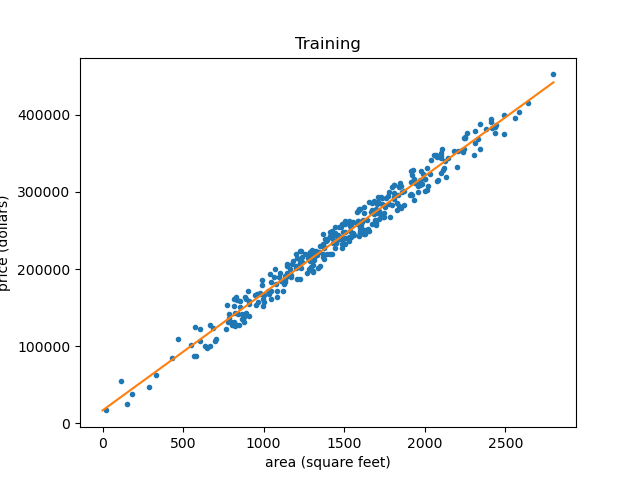

<IPython.core.display.Javascript object>


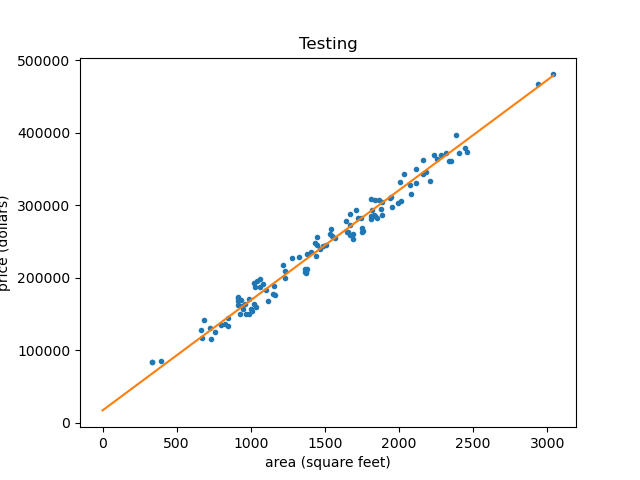

In [16]:
%matplotlib notebook

# Inport app libraries
from data.preprocessing_helpers import preprocess
from features.as_numpy import get_data_as_numpy_array
from models.train import split_into_training_and_testing_sets, train_model, model_test
from visualization.plots import get_plot_for_best_fit_line

# Resolving paths wiht pathlib.Path
raw_data_file_path = str(Path().resolve() / "univariate-linear-regression" / "data" / "raw" / "housing_data.txt")
clean_data_file_path = str(Path().resolve() / "univariate-linear-regression" / "data" / "clean" / "clean_housing_data.txt")

# Prepare the figure
preprocess(raw_data_file_path, clean_data_file_path)
data_array = get_data_as_numpy_array(clean_data_file_path, 2)
training_set, testing_set = split_into_training_and_testing_sets(data_array)
slope, intercept = train_model(training_set)
print("Slope: {0}, Intercept: {1}".format(slope, intercept))
print("R Square of fit on the testing set is {0}".format(model_test(testing_set, slope, intercept)))

#Plotting images
training_figure = get_plot_for_best_fit_line(slope, intercept, training_set[:, 0], training_set[:, 1], "Training")
training_figure.show()
#training_figure.savefig('univariate-linear-regression/src/test/visualization/baseline/test_plot_for_linear_data.png')
testing_figure = get_plot_for_best_fit_line(slope, intercept, testing_set[:, 0], testing_set[:, 1], "Testing")
testing_figure.show()

### SECOND STEP: WE CREATE THE TEST MODULE FUNCTION

### THIRD STEP: WE GENERATE THE BASELINE IMAGE

In [17]:
%cd univariate-linear-regression/src/test
with open("visualization/test_plots.py", "w") as text_file:
    text_file.write("""
import pytest
import numpy as np

from visualization import get_plot_for_best_fit_line
#from visualization.plots import get_plot_for_best_fit_line ## Another way to call the function.

# Declare the test class
class TestGetPlotForBestFitLine(object):
    @pytest.mark.mpl_image_compare  # Under the hood baseline generation and comparison
    def test_plot_for_linear_data(self):
        slope = 2.0
        intercept = 1.0
        x_array = np.array([1.0, 2.0, 3.0]) # Linear data set
        y_array = np.array([3.0, 5.0, 7.0])
        title = "Test plot for linear data"
        return get_plot_for_best_fit_line(slope, intercept, x_array, y_array, title)
    """)
    
!pytest -k "test_plot_for_linear_data" --mpl-generate-path visualization/baseline
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 31 items / 30 deselected / 1 selected

visualization\test_plots.py s                                            [100%]

====================== 1 skipped, 30 deselected in 1.38s ======================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


### FOURTH STEP: RUN THE TEST

In [18]:
%cd univariate-linear-regression/src/test
!pytest -k "test_plot_for_linear_data" --mpl
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 31 items / 30 deselected / 1 selected

visualization\test_plots.py .                                            [100%]

====================== 1 passed, 30 deselected in 1.40s =======================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


## RUNNING EVERYTHING

In [19]:
%cd univariate-linear-regression/src/test
!pytest
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 31 items

data\test_preprocessing_helpers.py ..............                        [ 45%]
data\test_preprocessing_helpers_conditional_avoid_fail.py s              [ 48%]
features\test_as_numpy.py ..                                             [ 54%]
features\test_as_numpy_avoid_fail.py xs                                  [ 61%]
features\test_as_numpy_avoid_fail2.py s                                  [ 64%]
models\test_train.py .......                                             [ 87%]
models

# <font color=darkred>4.12 Generate the baseline image</font> 

In this exercise, you will get one step closer to the real thing. During this whole course, you've built a library of tests using a Python script and an IPython console. In real life, you're more likely to use an IDE (Integrated Development Environment), that lets you write scripts in the language you want, organize them into your directories, and execute shell commands. Basically, an IDE increases your productivity by gathering the most common activities of software development into a single application: writing source code, executing, and debugging.

Here, you can see the directory you've built on the left pane. The upper right pane is where you will write your Python scripts, and the bottom right pane is a shell console, which replaces the IPython console you've used so far.

<img src='images/ide_guidance.png' width=50% alt='Parts of an integrated development environment'/>

In this exercise, you will test the function introduced in the video get_plot_for_best_fit_line() on another set of test arguments. Here is the test data.

|x|y|
|-|-|
|1.0| 3.0|
|2.0| 8.0|
|3.0|11.0|

The best fit line that the test will draw follows the equation $y=5x-2$. Two points, $(1.0, 3.0)$ and $(2.0, 8.0)$ will fall on the line. The point $(3.0, 11.0)$ won't. The title of the plot will be "Test plot for almost linear data".

The test is called test_plot_for_almost_linear_data() and it's your job to complete the test and generate the baseline image. 

pytest, numpy as np and get_plot_for_best_fit_line has been imported for you.

**Instructions**
- Add the correct pytest marker that helps in generating baselines and comparing images.
- Return the matplotlib figure returned by the function under test.
- The test that you wrote was written to a test class TestGetPlotForBestFitLine in the test module visualization/test_plots.py. - In the shell console, execute the command required to create the baseline image for this test only. The baseline folder should be in project/tests/visualization. Because it's a shell console and not an IPython one, you don't need to use the ! at the beginning of your command. Once you've ran your command and created your baseline, click Submit Answer.

**Results**

<font color=darkgreen>Great job completing the function and running the command required! After creating the baseline image, you should inspect it manually and verify if it looks as expected. Then you can then run the test against it, which you will do in the next exercise!</font>

In [20]:
%cd univariate-linear-regression/src/test
with open("visualization/test_plots.py", "w") as text_file:
    text_file.write("""
import pytest
import numpy as np

from visualization import get_plot_for_best_fit_line
#from visualization.plots import get_plot_for_best_fit_line ## Another way to call the function.

# Declare the test class
class TestGetPlotForBestFitLine(object):
    @pytest.mark.mpl_image_compare  # Under the hood baseline generation and comparison
    def test_plot_for_linear_data(self):
        slope = 2.0
        intercept = 1.0
        x_array = np.array([1.0, 2.0, 3.0]) # Linear data set
        y_array = np.array([3.0, 5.0, 7.0])
        title = "Test plot for linear data"
        return get_plot_for_best_fit_line(slope, intercept, x_array, y_array, title)
        
    # Add the pytest marker which generates baselines and compares images
    @pytest.mark.mpl_image_compare
    def test_plot_for_almost_linear_data(self):
        slope = 5.0
        intercept = -2.0
        x_array = np.array([1.0, 2.0, 3.0])
        y_array = np.array([3.0, 8.0, 11.0])
        title = "Test plot for almost linear data"
        # Return the matplotlib figure returned by the function under test
        return get_plot_for_best_fit_line(slope, intercept, x_array, y_array, title)
    """)
    
!pytest -k "TestGetPlotForBestFitLine" --mpl-generate-path visualization/baseline
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 32 items / 30 deselected / 2 selected

visualization\test_plots.py ss                                           [100%]

====================== 2 skipped, 30 deselected in 1.65s ======================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


# <font color=darkred>4.13 Run the tests for the plotting function</font> 

Shortly after the baseline image was generated, one of your colleagues modified the plotting function. You have to run the tests in order to check whether the function still works as expected.

Remember the following:

- The tests were housed in a test class TestGetPlotForBestFitLine in the test module visualization/test_plots.py. You can specify this test class in the pytest command by either using its node ID or the $-k$ command line flag.
- To ensure plots are compared to the baseline during testing, the pytest command must include a special command line flag that comes from the pytest-mpl package.

**Instructions**
- Run the tests in this test class in the console. Because it's a shell console and not an IPython one, you don't need to use the ! at the beginning of your command. You should see two failures.

**Results**

<font color=darkgreen>Good job! Unfortunately, your colleague has done something horrible and both tests are failing. In the test result report, you probably saw that pytest saved the actual plot, the baseline and the pixelwise difference to a temporary folder. In the next exercise, you will look at these images and try to fix the wreck that your colleague has caused.</font>

In [21]:
%cd univariate-linear-regression/src/test
with open("visualization/test_plots.py", "w") as text_file:
    text_file.write("""
import pytest
import numpy as np

from visualization import get_plot_for_best_fit_line
#from visualization.plots import get_plot_for_best_fit_line ## Another way to call the function.

# Declare the test class
class TestGetPlotForBestFitLine(object):
    @pytest.mark.mpl_image_compare  # Under the hood baseline generation and comparison
    def test_plot_for_linear_data(self):
        slope = 2.0
        intercept = 1.0
        x_array = np.array([1.0, 2.0, 3.0]) # Linear data set
        y_array = np.array([3.0, 5.0, 7.0])
        title = "Test plot for linear data"
        return get_plot_for_best_fit_line(slope, intercept, x_array, y_array, title)
        
    # Add the pytest marker which generates baselines and compares images
    @pytest.mark.mpl_image_compare
    def test_plot_for_almost_linear_data(self):
        slope = -2.0
        intercept = 10.0
        x_array = np.array([1.0, 2.0, 3.0])
        y_array = np.array([8.0, 6.0, 5.0])
        title = "Test plot for almost linear data"
        # Return the matplotlib figure returned by the function under test
        return get_plot_for_best_fit_line(slope, intercept, x_array, y_array, title)
    """)
    
!pytest -k "TestGetPlotForBestFitLine" --mpl
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 32 items / 30 deselected / 2 selected

visualization\test_plots.py .F                                           [100%]

================================== FAILURES ===================================
_________ TestGetPlotForBestFitLine.test_plot_for_almost_linear_data __________
Error: Image files did not match.
  RMS Value: 16.92978038513462
  Expected:  
    C:\Users\jaces\AppData\Local\Temp\tmpx64o4nzo\test_plots.test_plot_for_almost_linear_data\baseline.png
  Actual:    
    C:\Users\jac

# <font color=darkred>4.14 Fix the plotting function</font> 

In the last exercise, pytest saved the baseline images, actual images, and images containing the pixelwise difference in a temporary folder. The difference image for one of the tests test_on_almost_linear_data() is shown below.

<img src='images/test_plot_for_almost_linear_data-failed-diff.png' width=50%/>

The black areas are where the actual image and the baseline matches. The white areas are where they don't match.

This clearly tells us that something is wrong with the axis labels. Take a look at the plots section to see the baseline (plot 1/2) and the actual plot (plot 2/2). Based on that, it's your job to fix the plotting function.

|Baseline|Actual|
|-|-|
|<img src='images/ex4-14-plot1.svg' width=80%/>|<img src='images/ex4-14-plot2.svg' width=80%/>|

**Instructions**
- Fill in the axis labels xlabel and ylabel so that they match the baseline plot (plot 1/2).

- Now that you have fixed the function, run all the tests in the tests directory, remembering that the current working directory in the IPython console is tests. What is the outcome?

    - <font color=red>All 25 tests pass</font> _According to the web course exercise_.
    - 22 tests are passing and 3 are failing.
    - 24 tests are passing and 1 is failing.

**Results**

<font color=darkgreen>That is amazing! The linear regression project is now well-tested with 25 tests and they are all passing, thanks to your efforts throughout the course. With the skills and techniques you learned here, you can now go and test your own data science projects!</font>

In [22]:
# just to make the excercise in the curso
import matplotlib.pyplot as plt
import numpy as np

def get_plot_for_best_fit_line(slope, intercept, x_array, y_array, title):
    fig, ax = plt.subplots()
    ax.plot(x_array, y_array, ".")
    ax.plot([0, np.max(x_array)], [intercept, slope * np.max(x_array) + intercept], "-")
    # Fill in with axis labels so that they match the baseline
    ax.set(xlabel='area (square feet)', ylabel='price (dollars)', title=title)
    return fig

In [23]:
# To real repare the error in the function

%cd univariate-linear-regression/src/test
with open("visualization/test_plots.py", "w") as text_file:
    text_file.write("""
import pytest
import numpy as np

from visualization import get_plot_for_best_fit_line
#from visualization.plots import get_plot_for_best_fit_line ## Another way to call the function.

# Declare the test class
class TestGetPlotForBestFitLine(object):
    @pytest.mark.mpl_image_compare  # Under the hood baseline generation and comparison
    def test_plot_for_linear_data(self):
        slope = 2.0
        intercept = 1.0
        x_array = np.array([1.0, 2.0, 3.0]) # Linear data set
        y_array = np.array([3.0, 5.0, 7.0])
        title = "Test plot for linear data"
        return get_plot_for_best_fit_line(slope, intercept, x_array, y_array, title)
        
    # Add the pytest marker which generates baselines and compares images
    @pytest.mark.mpl_image_compare
    def test_plot_for_almost_linear_data(self):
        slope = 5.0
        intercept = -2.0
        x_array = np.array([1.0, 2.0, 3.0])
        y_array = np.array([3.0, 8.0, 11.0])
        title = "Test plot for almost linear data"
        # Return the matplotlib figure returned by the function under test
        return get_plot_for_best_fit_line(slope, intercept, x_array, y_array, title)
    """)
    
!pytest -k "TestGetPlotForBestFitLine" --mpl
%cd ../../..

C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression\src\test
============================= test session starts =============================
platform win32 -- Python 3.8.8, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.3.4
Freetype: 2.10.4
rootdir: C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python\univariate-linear-regression
plugins: cov-2.12.1, mock-3.6.1, mpl-0.13
collected 32 items / 30 deselected / 2 selected

visualization\test_plots.py ..                                           [100%]

====================== 2 passed, 30 deselected in 1.72s =======================
C:\Users\jaces\Documents\Data Science\Python\Cursos\___Unit Testing for Data Science in Python


# <font color=darkred>4.15 Congratulations</font>

1. Congratulations
>You have reached the finish line. Congratulations!

2. Fireworks
>I can already hear the fireworks going off!

3. You've written so many tests
>During the course, you have written not one,

4. You've written so many tests
>not five,

5. You've written so many tests
>not ten,

6. You've written so many tests
>but twenty five tests.

7. You learned a lot
>In the process, you have learned a lot of unit testing techniques and concepts.

8. You learned a lot
>Most importantly, you now know that testing data science projects saves a lot of time and effort. You learned how to use the pytest package to test return values and exceptions, run tests and how to read the test result reports. Just being able to test is not enough. That's why you then learned how to test a function really well using the idea of normal, special and bad arguments. You also got familiar with Test Driven Development, which is the ultimate best practice in testing and where tests get written before implementation. When the number of tests start growing, it becomes a pain to manage them. That's why you then picked up test organization and management skills, with a focus on easy discovery of tests and keeping the test suite always green. Finally, you learned some pretty advanced techniques like setup, teardown and mocking. But that's not all. You also learned how to test the most complicated data science models using sanity tests. And to add the cherry to the cake, or should I say cheese to the pizza, you also learned how to test plots. With all these skills, you will be easily able to test real world data science projects.

9. Code for this course
>Since this was a course on testing, you didn't always get to see how the functions under test were implemented. If you are interested about that, the entire code for this course is available in this GitHub repository.

10. Icon sources
>And here is the list of image sources

11. Image sources
>for the entire course.

12. I wish you all the best!
>Thanks for going on this unit testing journey with me. I wish you all the best.

# Aditional material

- Datacamp course: https://learn.datacamp.com/courses/unit-testing-for-data-science-in-python
- Project https://github.com/gutfeeling/univariate-linear-regression
- Using matplotlib in jupyter notebooks — comparing methods and some tips: https://medium.com/@Med1um1/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1